In [ ]:
'''
Clustering Analysis 
A) Implement K-Means clustering on Iris.csv dataset. Determine the number of 
clusters using the elbow method.
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Iris dataset directly from seaborn
df = sns.load_dataset("iris")

# Display first 5 rows
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# Select features (attributes) for clustering (e.g., sepal_length, sepal_width, petal_length, petal_width)
X = df.iloc[:, 1:-1]  # Exclude the first column (id) and the last column (species)

In [6]:
X

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [7]:
# Standardize the feature matrix (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [9]:
inertia

[450.0,
 149.5644912164707,
 127.31742412220018,
 74.24391953311728,
 57.94932812049257,
 46.507154272195756,
 40.97340775686134,
 34.29606921621072,
 29.819669802832685,
 26.442321160268044]

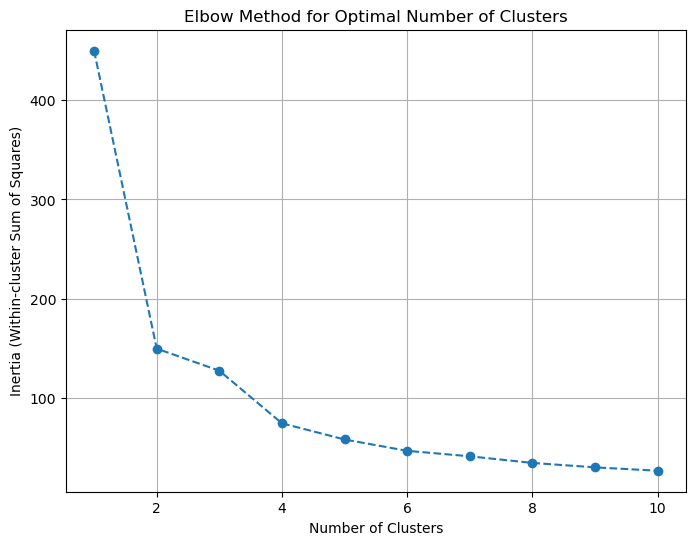

In [10]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()